# TP1 : Algorithme EM et modèle de mélange gaussien

## Introduction à l'estimation statistique - G3 SDIA

L'objectif de ce TP est d'implémenter l'algorithme EM pour estimer par maximum de vraisemblance les paramètres d'un modèle de mélange gaussien.

On utilisera le dataset *Old Faithful*, qui décrit 272 éruptions du geyser appelé Old Faithful du parc national de Yellowstone aux États-Unis. Chaque observation est constituée de 2 variables : le temps d'attente avant l'éruption (en minutes) et la durée de l'éruption (en minutes).

### Instructions

1. Renommer votre notebook sous la forme `tp1_Nom1_Nom2.ipynb`, et inclure le nom du binôme dans le notebook. 

2. Votre code, ainsi que toute sortie du code, doivent être commentés !

3. Déposer votre notebook sur Moodle dans la section prévue à cet effet avant la date limite : 15 Octobre 2023, 23h59.

In [1]:
# Import necessary libraries
import numpy as np
import scipy.stats as ss
import seaborn
from matplotlib import pyplot as plt

**Q1**. Charger le dataset, normaliser puis visualiser les données. Commenter.

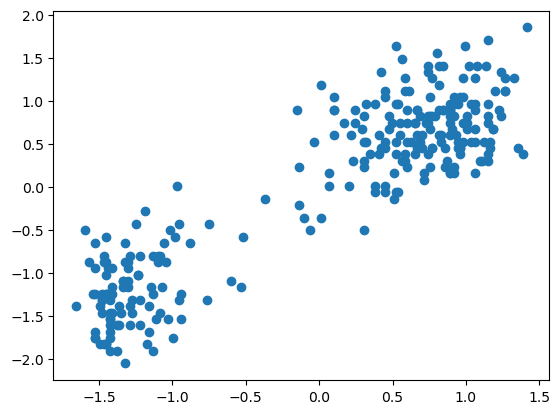

In [6]:
# Load the "Old Faithful" dataset from the Seaborn library
df = seaborn.load_dataset('geyser')
X = df[['duration', 'waiting']].values
N, D = X. shape

# Standardize data to avoid numerical instabilities
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# Show data
plt.scatter(X_normalized[:, 0], X_normalized[:, 1])
 


----- Votre réponse ici -----








**Q2**. On note $\mathbf{x}_1,...,\mathbf{x}_n$ les données. On souhaite les modéliser par un modèle de mélange gaussien à $K$ composantes.

Écrire une fonction permettant de calculer la log-vraisemblance :
$$ \log \mathcal{L}(\theta;\mathbf{x}_1,...,\mathbf{x}_n) = \sum_{i=1}^n \log \left( \sum_{k=1}^K \pi_k \frac{1}{2 \pi \text{det}(\boldsymbol{\Sigma}_k)^{1/2}} \exp \left( \frac{1}{2} (\mathbf{x}_i - \boldsymbol{\mu}_k)^{\top} \boldsymbol{\Sigma}_k^{-1} (\mathbf{x}_i - \boldsymbol{\mu}_k) \right) \right), $$
avec $\theta = \{ \boldsymbol{\mu_1}, ..., \boldsymbol{\mu_k}, \boldsymbol{\Sigma}_1, ..., \boldsymbol{\Sigma}_k, \pi_1, ..., \pi_k \}$.

On pourra utiliser la fonction $\texttt{multivariate} \_ \texttt{normal.pdf}$ de la librairie scipy.stats.

In [20]:
X.shape

(272, 2)

In [68]:
def log_likelihood(X,theta): # Fill in the appropriate arguments
    
    log_likelihood = 0
    K = int(len(theta)/3)
    for i in range(len(X)):
        log_likelihood += np.log(sum([theta[2*K+k]*ss.multivariate_normal.pdf(X[i], theta[k],theta[K+k]) for k in range(K)]))
    return(log_likelihood)
     
     
# Test
# donne moi trois vecteurs : premier de taille (10*2) , deuxième (10*2*2)(matrice identité) et troisème (10,)
premier_vect = np.array([[1,2],[3,4],[5,6],[7,1],[9,1],[11,12],[1,0],[15,0],[17,18],[10,20]])
deuixème_vect = np.array([[[1,0],[0,1]]]*10)
troisième_vect = np.array([0,2,1,1,1,0,7,0,9,1])

vect_global =[]
for i in range(10):
    vect_global.append(premier_vect[i])
for i in range(10):
    vect_global.append(deuixème_vect[i])
for i in range(10):
    vect_global.append(troisième_vect[i])
    
 
log_likelihood(X_normalized, vect_global)

-378.46310113938546

**Q3**. Écrire une fonction qui implémente l'algorithme EM dans ce modèle, prenant pour arguments les données, le nombre de composantes $K$, et le nombre d'itérations de l'algorithme $N_{\text{iter}}$. Cette fonction retournera un tableau de taille $N_{\text{iter}} + 1$ contenant l'évolution des valeurs de la log-vraisemblance, ainsi que les valeurs finales des paramètres.

Initialisation des paramètres :
- Pour les moyennes, les $K$ premières observations du dataset ;
- Pour les matrices de covariances, la matrice identité ;
- $\pi_k = 1/K$.

In [ ]:
def EM_algorithm_v1(X, K, Niter):
    N, D = X. shape
    
    # Initialize parameters

    # # # # # # # # #
    # YOUR CODE HERE #
    # # # # # # # # #

    for i in range(0,Niter):
        # E-STEP
        
        # # # # # # # # #
        # YOUR CODE HERE #
        # # # # # # # # #
        
        # M-STEP
        
        # # # # # # # # #
        # YOUR CODE HERE #
        # # # # # # # # #
        
    return # YOUR CODE HERE #

**Q4**. Faire tourner l'algorithme avec $K = 2$ et $N_{\text{iter}} = 50$.

Afficher l'évolution de la log-vraisemblance en fonction des itérations. Commenter.

Sur une même figure, afficher le dataset et représenter les estimations des deux lois normales du mélange à l'aide d'un *contour plot*. On pourra utiliser la fonction $\texttt{plt.contour}$.

In [ ]:
K = 2
Niter = 50

# # # # # # # # #
# YOUR CODE HERE #
# # # # # # # # #

----- Votre réponse ici -----

**Q5**. On souhaite maintenant étudier l'influence de l'initialisation sur les résultats. Modifier la fonction implémentant l'algorithme EM en y rajoutant un argument pour la graine aléatoire. Les paramètres seront maintenant initialisés de la manière suivante :
- $\boldsymbol{\mu}_k \sim \mathcal{N}(\mathbf{0},\mathbf{I}_2)$ ;
- $[\pi_1, ..., \pi_K]^{\top} \sim \text{Dirichlet}([1, ..., 1]^{\top})$ ;
- On gardera l'initialisation des matrices de covariance à la matrice identité.

In [ ]:
def EM_algorithm_v2(X, K, Niter, seed):
    N, D = X. shape
    
    # Initialize parameters
    np.random.seed(seed)

    # # # # # # # # #
    # YOUR CODE HERE #
    # # # # # # # # #

    for i in range(0,Niter):
        # E-STEP
        
        # # # # # # # # #
        # YOUR CODE HERE #
        # # # # # # # # #
        
        # M-STEP
        
        # # # # # # # # #
        # YOUR CODE HERE #
        # # # # # # # # #
        
    return # YOUR CODE HERE #

**Q6**. On choisit maintenant $K=3$. Représenter l'évolution de la log-vraisemblance pour 10 graines aléatoires différentes. Commenter.

Afficher deux cas où la solution retournée par l'algorithme EM est visuellement différente. Commenter.

Quelle estimation de paramètres doit-on choisir ?

In [ ]:
K = 3

# # # # # # # # #
# YOUR CODE HERE #
# # # # # # # # #


----- Votre réponse ici -----

**Q7**. On cherche maintenant à choisir la valeur optimale de $K$. Pour cela, on aimerait pouvoir comparer la vraisemblance des modèles obtenus avec différentes valeurs de $K$.

Cela peut se faire au travers d'un critère de sélection de modèle. Dans ce TP, nous étudierons le critère dit BIC :
$$ \text{BIC}(m) = k(m) \log(n) - 2 \log \mathcal{L}(m),$$
où $m$ est un modèle (ici donné par une valeur de $K$), $k_m$ est le nombre de paramètres libres dans le modèle, $n$ le nombre d'échantillons, et $\mathcal{L}_m$ le maximum de la fonction de vraisemblance de le modèle $m$. On sélectionne le modèle avec le plus faible BIC.

Montrer que $$k(m) = \frac{K}{2} (D+1)(D+2) - 1.$$

Comparer les valeurs de $K$ allant de 1 à 6. Quel est le modèle optimal d'après le critère BIC ?

In [ ]:
# # # # # # # # #
# YOUR CODE HERE #
# # # # # # # # #


----- Votre réponse ici -----

**Question bonus**. Expliquer comment l'algorithme EM peut-être utilisé pour du clustering.


----- Votre réponse ici -----